# Preprocessing & Final Feature Selection

In the EDA notebook, we began the process of narrowing down which features to keep. Here, we will continue that process until our data resembles that which we will use for testing models. 

*Note*

During the course of this project, I experimented with different subsets of the data. While the main focus was on 2015, I used this notebook to create data for other years, which is commented on in certain sections.

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

from library.sb_utils import save_file

### This is where I changed the code to get the 2016 and 2017 data. For the original 2015 data just replace the filepath with

    filepath = '../data/processed/data3.csv'


In [2]:
filepath = '../data/processed/data3New.csv'

In [3]:
data = pd.read_csv(filepath)

In [4]:
data.head()

,ab_id,batter_id,event,g_id,inning,p_score,p_throws,pitcher_id,stand,top,...,type,pitch_type,b_score,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,2015000001,572761,Groundout,201500001,1,0,L,452657,L,True,...,S,FF,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2015000001,572761,Groundout,201500001,1,0,L,452657,L,True,...,S,FF,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,2015000001,572761,Groundout,201500001,1,0,L,452657,L,True,...,S,FF,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,2015000001,572761,Groundout,201500001,1,0,L,452657,L,True,...,B,FF,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,2015000001,572761,Groundout,201500001,1,0,L,452657,L,True,...,B,CU,0.0,1.0,2.0,0.0,5.0,0.0,0.0,0.0


In [5]:
data.dtypes

ab_id           int64
batter_id       int64
event          object
g_id            int64
inning          int64
p_score         int64
p_throws       object
pitcher_id      int64
stand          object
top              bool
id              int64
last_name      object
date           object
type           object
pitch_type     object
b_score       float64
b_count       float64
s_count       float64
outs          float64
pitch_num     float64
on_1b         float64
on_2b         float64
on_3b         float64
dtype: object

In [6]:
data.columns

Index(['ab_id', 'batter_id', 'event', 'g_id', 'inning', 'p_score', 'p_throws',
       'pitcher_id', 'stand', 'top', 'id', 'last_name', 'date', 'type',
       'pitch_type', 'b_score', 'b_count', 's_count', 'outs', 'pitch_num',
       'on_1b', 'on_2b', 'on_3b'],
      dtype='object')

In [7]:
data.id

0        452657
1        452657
2        452657
3        452657
4        452657
          ...  
21575    594798
21576    594798
21577    594798
21578    594798
21579    594798
Name: id, Length: 21580, dtype: int64

In [8]:
df = data.drop(columns = ['ab_id','batter_id','g_id','id','pitcher_id','top','event', 'last_name', 'date','type'])

If you want the target variable encoded, the code below can be used:

    df_encoded = pd.get_dummies(data, columns = ['pitch_type'])

### Separating the predictive and target features

In [9]:
X = df.drop(columns = ["pitch_type"])
y = df["pitch_type"]

In [11]:
datapath = '../data/processed'
save_file(X, 'X_pre_new.csv', datapath)
save_file(y, 'y_pre_new.csv', datapath)

Writing file.  "../data/processed\X_pre_new.csv"
Writing file.  "../data/processed\y_pre_new.csv"


    datapath = '../data/processed'
    save_file(X, 'X_pre16.csv', datapath)
    save_file(y, 'y_pre16.csv', datapath)

    datapath = '../data/processed'
    save_file(X, 'X_pre17.csv', datapath)
    save_file(y, 'y_pre17.csv', datapath)

In [12]:
X

,inning,p_score,p_throws,stand,b_score,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,1,0,L,L,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0,L,L,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,1,0,L,L,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,1,0,L,L,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,1,0,L,L,0.0,1.0,2.0,0.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21575,4,0,R,R,0.0,1.0,2.0,1.0,4.0,0.0,0.0,0.0
21576,4,0,R,R,0.0,2.0,2.0,1.0,5.0,0.0,0.0,0.0
21577,4,0,R,L,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
21578,4,0,R,L,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0


In [13]:
y

0        FF
1        FF
2        FF
3        FF
4        CU
         ..
21575    FF
21576    CH
21577    CH
21578    CH
21579    FF
Name: pitch_type, Length: 21580, dtype: object

### Quick Summary

Lets take a look at the summary statistics (especially standard deviation) of these features (in X) before performing any scaling. 

Regarding y, depending of the classifier being used, we may or may not want have the pitch type feature encoded. Without encoding however, we won't have numerical data to use for summary statistics.

In [14]:
X.describe()

,inning,p_score,b_score,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
count,21580.000000,21580.000000,21580.000000,21580.000000,21580.00000,21580.000000,21580.000000,21580.000000,21580.000000,21580.000000
mean,3.985496,1.427804,0.888415,0.804171,0.93721,0.978591,2.882437,0.238971,0.142122,0.066172
std,2.111982,1.949814,1.271031,0.928073,0.83112,0.815136,1.719938,0.426465,0.349184,0.248589
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,4.000000,1.000000,0.000000,1.000000,1.00000,1.000000,3.000000,0.000000,0.000000,0.000000
75%,6.000000,2.000000,1.000000,1.000000,2.00000,2.000000,4.000000,0.000000,0.000000,0.000000
max,9.000000,12.000000,9.000000,4.000000,2.00000,2.000000,13.000000,1.000000,1.000000,1.000000


In [15]:
#numerical column names
cols_numerical = X.describe().columns

In [16]:
X.std()

inning       2.111982
p_score      1.949814
b_score      1.271031
b_count      0.928073
s_count      0.831120
outs         0.815136
pitch_num    1.719938
on_1b        0.426465
on_2b        0.349184
on_3b        0.248589
dtype: float64

In [17]:
y.describe()

count     21580
unique        7
top          FF
freq       9201
Name: pitch_type, dtype: object

In [18]:
y_encoded = pd.get_dummies(y)
y_encoded

,CH,CU,FC,FF,FT,SI,SL
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
21575,0,0,0,1,0,0,0
21576,1,0,0,0,0,0,0
21577,1,0,0,0,0,0,0
21578,1,0,0,0,0,0,0


In [19]:
y_encoded.describe()

,CH,CU,FC,FF,FT,SI,SL
count,21580.000000,21580.000000,21580.000000,21580.000000,21580.000000,21580.000000,21580.000000
mean,0.123587,0.105746,0.037720,0.426367,0.122104,0.015941,0.168536
std,0.329117,0.307519,0.190523,0.494560,0.327413,0.125249,0.374350
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
y_encoded.std()

CH    0.329117
CU    0.307519
FC    0.190523
FF    0.494560
FT    0.327413
SI    0.125249
SL    0.374350
dtype: float64

Depending on the models we try in the future, we may or may not want scaled data, so we will make both for now

In the EDA notebook, we saw that the handedness (right or left) of the pitcher and hitter seemed to affect the pitch distribution, so we will likely want to encode those features. Because this is a case where there is clear collinearity (if it isn't left, it's right) We may want to drop one of the columns. It is something to keep in mind, so I'll try both ways of encoding for now.

In [20]:
X_encode = pd.get_dummies(X)

In [21]:
X_drop = pd.get_dummies(X, drop_first = True)

In [22]:
X_encode

,inning,p_score,b_score,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,p_throws_L,p_throws_R,stand_L,stand_R
0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
1,1,0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1,0,1,0
2,1,0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,1,0,1,0
3,1,0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,1,0,1,0
4,1,0,0.0,1.0,2.0,0.0,5.0,0.0,0.0,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,4,0,0.0,1.0,2.0,1.0,4.0,0.0,0.0,0.0,0,1,0,1
21576,4,0,0.0,2.0,2.0,1.0,5.0,0.0,0.0,0.0,0,1,0,1
21577,4,0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0,1,1,0
21578,4,0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0,1,1,0


In [23]:
X_drop

,inning,p_score,b_score,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,p_throws_R,stand_R
0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0
1,1,0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0,0
2,1,0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0,0
3,1,0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0,0
4,1,0,0.0,1.0,2.0,0.0,5.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21575,4,0,0.0,1.0,2.0,1.0,4.0,0.0,0.0,0.0,1,1
21576,4,0,0.0,2.0,2.0,1.0,5.0,0.0,0.0,0.0,1,1
21577,4,0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1,0
21578,4,0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1,0


In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [25]:
scaler = StandardScaler()

In [26]:
scaler.fit(X_encode)

StandardScaler()

In [31]:
scaled_X = scale(X_encode)
scaled_X

array([[-1.41363168, -0.79187237, -0.73229365, ..., -1.08780816,
         1.28356064, -1.28356064],
       [-1.41363168, -0.79187237, -0.73229365, ..., -1.08780816,
         1.28356064, -1.28356064],
       [-1.41363168, -0.79187237, -0.73229365, ..., -1.08780816,
         1.28356064, -1.28356064],
       ...,
       [ 0.00686772,  1.35655681, -0.73229365, ...,  0.91927974,
         1.28356064, -1.28356064],
       [ 0.00686772,  1.35655681, -0.73229365, ...,  0.91927974,
         1.28356064, -1.28356064],
       [ 0.00686772,  1.35655681, -0.73229365, ...,  0.91927974,
         1.28356064, -1.28356064]])

In [34]:
scaled_df1 = pd.DataFrame(scaled_X, columns = X_encode.columns)
scaled_df1

,inning,o,p_score,b_score,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,p_throws_L,p_throws_R,stand_L,stand_R
0,-1.413632,-0.791872,-0.732294,-0.698988,-0.866515,-1.127674,-1.200552,-1.094505,-0.560367,-0.407023,-0.266198,1.087808,-1.087808,1.283561,-1.283561
1,-1.413632,-0.791872,-0.732294,-0.698988,-0.866515,0.075550,-1.200552,-0.513075,-0.560367,-0.407023,-0.266198,1.087808,-1.087808,1.283561,-1.283561
2,-1.413632,-0.791872,-0.732294,-0.698988,-0.866515,1.278774,-1.200552,0.068354,-0.560367,-0.407023,-0.266198,1.087808,-1.087808,1.283561,-1.283561
3,-1.413632,-0.791872,-0.732294,-0.698988,-0.866515,1.278774,-1.200552,0.649784,-0.560367,-0.407023,-0.266198,1.087808,-1.087808,1.283561,-1.283561
4,-1.413632,-0.791872,-0.732294,-0.698988,0.211011,1.278774,-1.200552,1.231214,-0.560367,-0.407023,-0.266198,1.087808,-1.087808,1.283561,-1.283561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0.006868,0.282342,-0.732294,-0.698988,0.211011,1.278774,0.026265,0.649784,-0.560367,-0.407023,-0.266198,-0.919280,0.919280,-0.779083,0.779083
21576,0.006868,0.282342,-0.732294,-0.698988,1.288537,1.278774,0.026265,1.231214,-0.560367,-0.407023,-0.266198,-0.919280,0.919280,-0.779083,0.779083
21577,0.006868,1.356557,-0.732294,-0.698988,-0.866515,-1.127674,1.253082,-1.094505,-0.560367,-0.407023,-0.266198,-0.919280,0.919280,1.283561,-1.283561
21578,0.006868,1.356557,-0.732294,-0.698988,-0.866515,0.075550,1.253082,-0.513075,-0.560367,-0.407023,-0.266198,-0.919280,0.919280,1.283561,-1.283561


In [35]:
#verify the scaling (mean should be 0 and std 1 across the board)
scaled_df1.describe()

,inning,o,p_score,b_score,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,p_throws_L,p_throws_R,stand_L,stand_R
count,2.158000e+04,2.158000e+04,2.158000e+04,2.158000e+04,2.158000e+04,2.158000e+04,2.158000e+04,2.158000e+04,2.158000e+04,2.158000e+04,2.158000e+04,2.158000e+04,2.158000e+04,2.158000e+04,2.158000e+04
mean,-1.535239e-15,2.282285e-15,-2.982971e-15,-2.550117e-16,4.852493e-16,-2.578970e-15,-1.525337e-15,-4.437400e-15,-2.411828e-16,2.332554e-15,-3.223336e-15,-4.164839e-15,4.164839e-15,-1.207087e-15,1.004839e-15
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-1.413632e+00,-1.866087e+00,-7.322936e-01,-6.989883e-01,-8.665147e-01,-1.127674e+00,-1.200552e+00,-1.094505e+00,-5.603667e-01,-4.070226e-01,-2.661981e-01,-9.192797e-01,-1.087808e+00,-7.790828e-01,-1.283561e+00
25%,-9.401319e-01,-7.918724e-01,-7.322936e-01,-6.989883e-01,-8.665147e-01,-1.127674e+00,-1.200552e+00,-1.094505e+00,-5.603667e-01,-4.070226e-01,-2.661981e-01,-9.192797e-01,-1.087808e+00,-7.790828e-01,-1.283561e+00
50%,6.867722e-03,2.823422e-01,-2.194124e-01,-6.989883e-01,2.110114e-01,7.554995e-02,2.626457e-02,6.835435e-02,-5.603667e-01,-4.070226e-01,-2.661981e-01,-9.192797e-01,9.192797e-01,-7.790828e-01,7.790828e-01
75%,9.538673e-01,2.823422e-01,2.934688e-01,8.779281e-02,2.110114e-01,1.278774e+00,1.253082e+00,6.497840e-01,-5.603667e-01,-4.070226e-01,-2.661981e-01,1.087808e+00,9.192797e-01,1.283561e+00,7.790828e-01
max,2.374367e+00,1.356557e+00,5.422281e+00,6.382041e+00,3.443590e+00,1.278774e+00,1.253082e+00,5.882651e+00,1.784546e+00,2.456866e+00,3.756600e+00,1.087808e+00,9.192797e-01,1.283561e+00,7.790828e-01


In [36]:
#now doing the same for the encoding where we dropped one
scaled_X_drop = scale(X_drop)

In [37]:
scaled_df2 = pd.DataFrame(scaled_X_drop, columns = X_drop.columns)
scaled_df2

,inning,o,p_score,b_score,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,p_throws_R,stand_R
0,-1.413632,-0.791872,-0.732294,-0.698988,-0.866515,-1.127674,-1.200552,-1.094505,-0.560367,-0.407023,-0.266198,-1.087808,-1.283561
1,-1.413632,-0.791872,-0.732294,-0.698988,-0.866515,0.075550,-1.200552,-0.513075,-0.560367,-0.407023,-0.266198,-1.087808,-1.283561
2,-1.413632,-0.791872,-0.732294,-0.698988,-0.866515,1.278774,-1.200552,0.068354,-0.560367,-0.407023,-0.266198,-1.087808,-1.283561
3,-1.413632,-0.791872,-0.732294,-0.698988,-0.866515,1.278774,-1.200552,0.649784,-0.560367,-0.407023,-0.266198,-1.087808,-1.283561
4,-1.413632,-0.791872,-0.732294,-0.698988,0.211011,1.278774,-1.200552,1.231214,-0.560367,-0.407023,-0.266198,-1.087808,-1.283561
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0.006868,0.282342,-0.732294,-0.698988,0.211011,1.278774,0.026265,0.649784,-0.560367,-0.407023,-0.266198,0.919280,0.779083
21576,0.006868,0.282342,-0.732294,-0.698988,1.288537,1.278774,0.026265,1.231214,-0.560367,-0.407023,-0.266198,0.919280,0.779083
21577,0.006868,1.356557,-0.732294,-0.698988,-0.866515,-1.127674,1.253082,-1.094505,-0.560367,-0.407023,-0.266198,0.919280,-1.283561
21578,0.006868,1.356557,-0.732294,-0.698988,-0.866515,0.075550,1.253082,-0.513075,-0.560367,-0.407023,-0.266198,0.919280,-1.283561


In [38]:
scaled_df2.describe()

,inning,o,p_score,b_score,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,p_throws_R,stand_R
count,2.158000e+04,2.158000e+04,2.158000e+04,2.158000e+04,2.158000e+04,2.158000e+04,2.158000e+04,2.158000e+04,2.158000e+04,2.158000e+04,2.158000e+04,2.158000e+04,2.158000e+04
mean,-1.535239e-15,2.282285e-15,-2.982971e-15,-2.550117e-16,4.852493e-16,-2.578970e-15,-1.525337e-15,-4.437400e-15,-2.411828e-16,2.332554e-15,-3.223336e-15,4.164839e-15,1.004839e-15
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-1.413632e+00,-1.866087e+00,-7.322936e-01,-6.989883e-01,-8.665147e-01,-1.127674e+00,-1.200552e+00,-1.094505e+00,-5.603667e-01,-4.070226e-01,-2.661981e-01,-1.087808e+00,-1.283561e+00
25%,-9.401319e-01,-7.918724e-01,-7.322936e-01,-6.989883e-01,-8.665147e-01,-1.127674e+00,-1.200552e+00,-1.094505e+00,-5.603667e-01,-4.070226e-01,-2.661981e-01,-1.087808e+00,-1.283561e+00
50%,6.867722e-03,2.823422e-01,-2.194124e-01,-6.989883e-01,2.110114e-01,7.554995e-02,2.626457e-02,6.835435e-02,-5.603667e-01,-4.070226e-01,-2.661981e-01,9.192797e-01,7.790828e-01
75%,9.538673e-01,2.823422e-01,2.934688e-01,8.779281e-02,2.110114e-01,1.278774e+00,1.253082e+00,6.497840e-01,-5.603667e-01,-4.070226e-01,-2.661981e-01,9.192797e-01,7.790828e-01
max,2.374367e+00,1.356557e+00,5.422281e+00,6.382041e+00,3.443590e+00,1.278774e+00,1.253082e+00,5.882651e+00,1.784546e+00,2.456866e+00,3.756600e+00,9.192797e-01,7.790828e-01


# Remarks
Any information going in to a classifier needs to be openly available to a hitter/hitting team before a pitch was thrown (so as to avoid cheating). This was one of the key motivating factors in our feature selection process.  


### PCA, for the sake of curiosity

In [40]:
pca1 = PCA().fit(scaled_X)

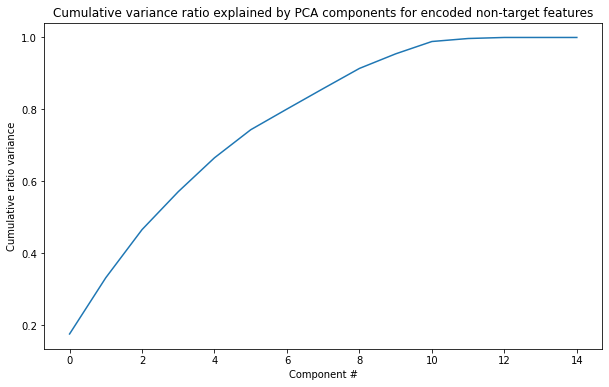

In [41]:
plt.subplots(figsize=(10, 6))
plt.plot(pca1.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for encoded non-target features');

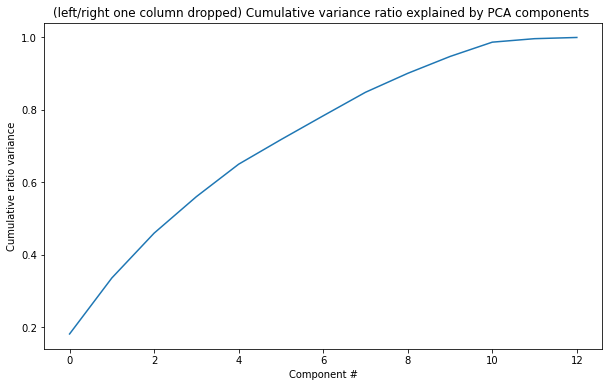

In [43]:
pca2 = PCA().fit(scaled_X_drop)
plt.subplots(figsize=(10, 6))
plt.plot(pca2.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('(left/right one column dropped) Cumulative variance ratio explained by PCA components ');

There doesn't appear to be a advantageous cutoff to consider here. 